<a href="https://colab.research.google.com/github/Uz8351/MyPhython/blob/master/EjercicioEstocasticoAula_38_3_17_Sep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

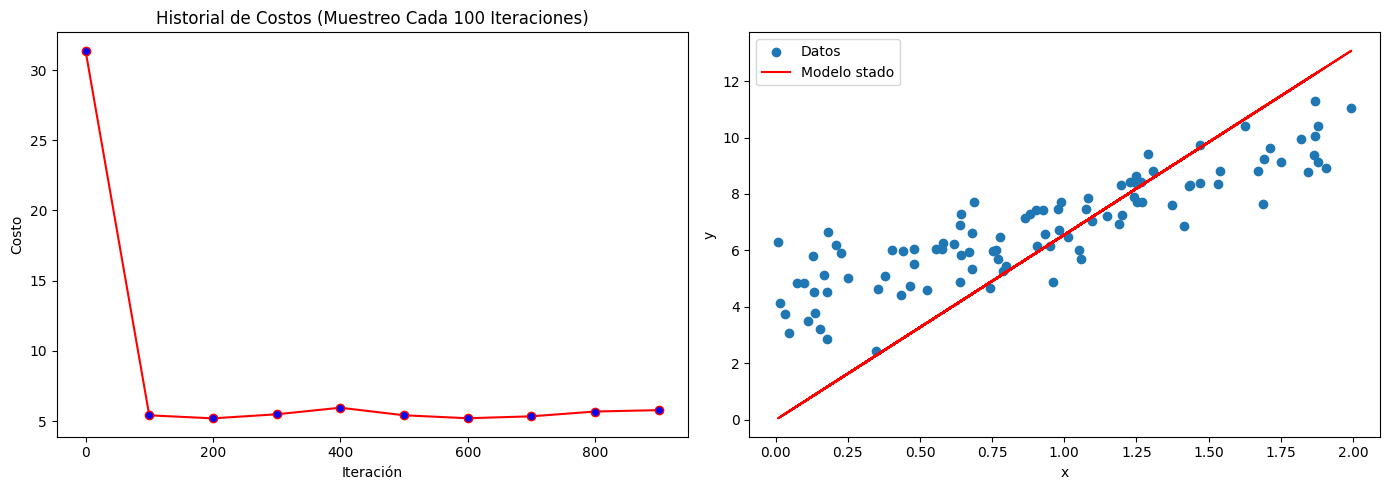

In [2]:
import numpy as np
import matplotlib.pyplot as plt
Factor_Aprendizaje=0.1
Iteraciones=1000
# Datos de ejemplo
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
# Función de pérdida vectorizada
def lin_reg(X, y, w):
  """
  Calcula el error cuadrático medio
  """
  return np.mean((y - X @ w)**2)

# Gradiente vectorizado
def gradient(X, y, w):
  """
  Calcula el gradiente del error cuadrático medio
  """
  return -2 * X.T @ (y - X @ w) / len(X)

# Descenso de gradiente estocástico
def sgd(X, y, lr, vueltas):


  # Inicializar pesos
  w = np.zeros(X.shape[1])

  # Entrenamiento
  train_loss = []
  for i in range(vueltas):

    # Muestra aleatoria
    idx = np.random.randint(len(X))
    xi = X[idx:idx+1]
    yi = y[idx:idx+1]

    # Actualizar pesos
    grad = gradient(xi, yi, w)
    w = w - lr * grad

    # Guardar pérdida
    train_loss.append(lin_reg(X, y, w))

  return w, train_loss

w, train_loss = sgd(X, y, Factor_Aprendizaje, Iteraciones)

# Suponiendo que train_loss es tu lista de costos
Ejemplo_intervalo = 100  # Intervalo de muestreo
Ejemplo_train_loss = train_loss[::Ejemplo_intervalo]  # Tomar una muestra cada 100 iteraciones
Ejemplo_Iteraciones = list(range(0, len(train_loss), Ejemplo_intervalo))  # Crear una lista de las iteraciones muestreadas

# Crear un gráfico
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)

# Graficar el historial de costos con muestreo
plt.plot(Ejemplo_Iteraciones, Ejemplo_train_loss, color='red', marker='o', markerfacecolor='blue')
plt.xlabel('Iteración')
plt.ylabel('Costo')
plt.title('Historial de Costos (Muestreo Cada 100 Iteraciones)')
# Graficar los datos y el modelo ajustado en el segundo gráfico
plt.subplot(1, 2, 2)
plt.scatter(X, y, label='Datos')
plt.plot(X, (X * w), color='red', label='Modelo stado')  # Calcular las predicciones del modelo
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Ajustar automáticamente el espaciado entre los gráficos
plt.tight_layout()

# Mostrar la figura
plt.show()
